<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of customers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.0. Write code to display the count of null values in each column<h3>

In [4]:
# Command: using isna() and sum()

# One sentance summary:
# applies is na on all columns and then sums the result

credit_train.isna().sum()
credit_test.isna().sum()

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

<AxesSubplot:xlabel='Amount', ylabel='Count'>

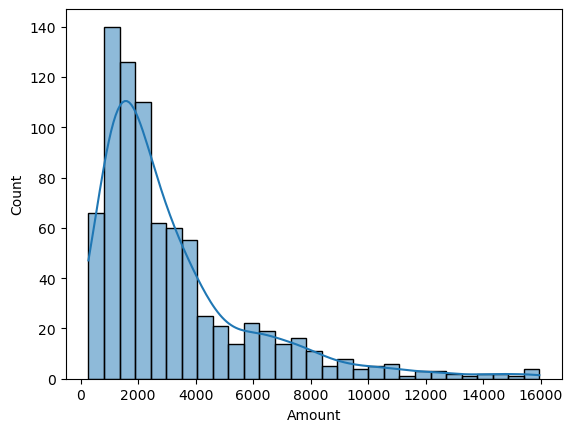

In [8]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

#TODO
sn.histplot(data=credit_train, x="Amount", kde=True)

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

<AxesSubplot:xlabel='CreditHistory.Critical', ylabel='Count'>

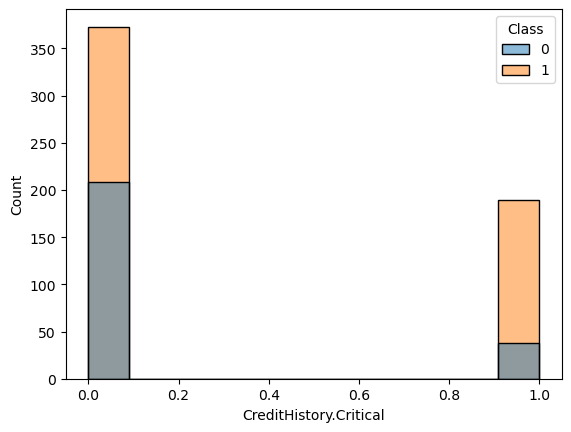

In [96]:
# Command:

# One sentence summary:
sn.histplot(data=credit_train, x="CreditHistory.Critical", hue="Class")

# Comment: From the plot below, people with no critical credit history are more than 50% and are classified as bad classes. For people with critical credit history, majority of them are classified as good classes. This could mean that good/bad classification depends not only on critical credit history, but other factors. Critical credit history alone won't give us the whole picture. p-values calculated at the end with all predictors give a better picture of the more important predictors.

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [12]:
# Used map function to use numeric 1's and 0's
credit_train['Class'] = credit_train['Class'].map({'Good': 1, 'Bad': 0})
# credit_train.head()
credit_test['Class'] = credit_test['Class'].map({'Good': 1, 'Bad': 0})
# credit_test.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,1,42,7882,2,4,45,1,2,1,1,1,0,0,0,1,0,0
1,0,24,4870,3,4,53,2,2,1,1,1,0,0,0,0,1,0
2,1,36,6948,2,2,35,1,1,0,1,0,1,0,0,1,0,0
3,0,12,1295,3,1,25,1,1,1,1,0,1,0,0,1,0,0
4,0,24,1282,4,2,32,1,1,1,1,1,0,0,0,1,0,0


<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [34]:
from sklearn.linear_model import LogisticRegression

# Get the first and last columns
X_train_credit_critical = credit_train.iloc[:,-1:]
y_train_credit_critical = credit_train.iloc[:, 0]
X_test_credit_critical = credit_test.iloc[:,-1:]
y_test_credit_critical = credit_test.iloc[:, 0]
# X_test_credit_critical.head()
# y_train_credit_critical.head()

In [35]:
credit_critical_model = LogisticRegression(random_state=0).fit(X_train_credit_critical, y_train_credit_critical)

<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [36]:
y_pred_critical_credit = credit_critical_model.predict(X_test_credit_critical)
# y_pred_critical_credit_proba = credit_critical_model.predict_proba(X_test_credit_critical)
train_score = credit_critical_model.score(X_train_credit_critical, y_train_credit_critical)
print("Train score: ", train_score)

Train score:  0.6955445544554455


In [40]:
# Produce confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test_credit_critical, y_pred_critical_credit)
print("Confusion matrix: ", cm)

[[  0  54]
 [  0 138]]


<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [41]:
# Command that outputs acccuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_credit_critical, y_pred_critical_credit)

0.71875

<h3>Q.7. Generate the ROC curve.</h3>

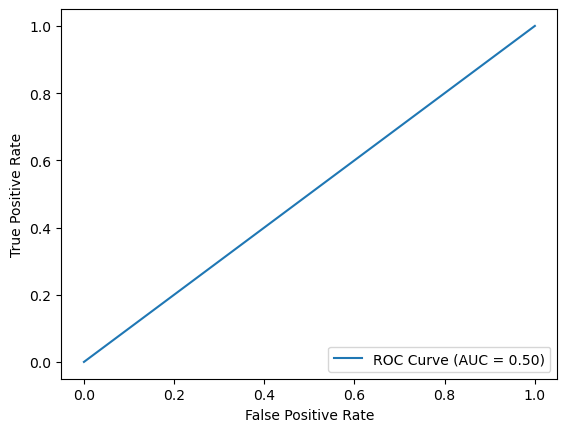

In [46]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test_credit_critical, y_pred_critical_credit)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression')
display.plot()
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [47]:
# Command(s):
print(roc_auc)

0.5


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train_lda = credit_train.loc[:, credit_train.columns != 'Class']
y_train_lda = credit_train.iloc[:, 0]
X_test_lda = credit_test.loc[:, credit_test.columns != 'Class']
y_test_lda = credit_test.iloc[:, 0]
# X_test_credit_critical.head()
# y_train_credit_critical.head()

In [52]:
lda_model = LinearDiscriminantAnalysis().fit(X_train_lda, y_train_lda)

In [53]:
y_pred_lda = lda_model.predict(X_test_lda)
# y_pred_lda = lda_model.predict_proba(X_test_lda)
train_score = lda_model.score(X_train_lda, y_train_lda)
print("Train score: ", train_score)

Train score:  0.775990099009901


In [54]:
cm = confusion_matrix(y_test_lda, y_pred_lda)
print("Confusion matrix: ", cm)

Confusion matrix:  [[ 18  36]
 [ 24 114]]


<h3>Q.10. What is the accuracy of the new model?</h3>

In [55]:
accuracy_score(y_test_lda, y_pred_lda)

0.6875

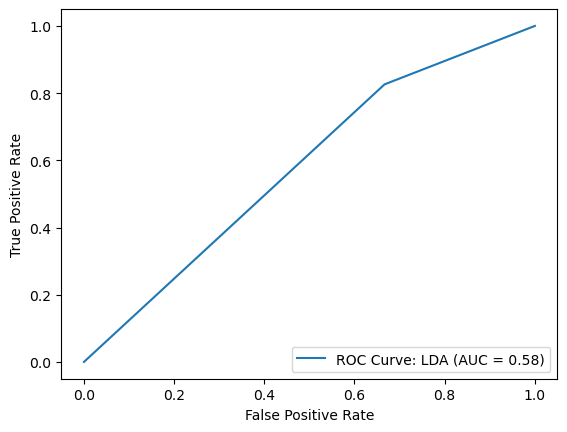

In [56]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_lda, y_pred_lda)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: LDA')
display.plot()
plt.show()

In [79]:
# Calculating p-values, code obtained from: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
import numpy as np
import statsmodels.api as sm
from scipy import stats

X = X_train_lda
y = y_train_lda

mod = sm.OLS(y,X)
fii = mod.fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Class   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              149.0
Date:                Tue, 21 Feb 2023   Prob (F-statistic):                   6.70e-226
Time:                        14:59:08   Log-Likelihood:                         -438.82
No. Observations:                 808   AIC:                                      909.6
Df Residuals:                     792   BIC:                                      984.8
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Duration                          -0.0045      0.002     -2.597      0.010      -0.008      -0.001
Amount                          -2.43e-06   7.79e-06     -0.312      0.755   -1.77e-05    1.29e-05
InstallmentRatePercentage         -0.0166      0.014     -1.151      0.250      -0.045       0.012
ResidenceDuration                  0.0257      0.014      1.879      0.061      -0.001       0.053
Age                                0.0036      0.001      2.597      0.010       0.001       0.006
NumberExistingCredits              0.0469      0.030      1.573      0.116      -0.012       0.105
NumberPeopleMaintenance            0.0907      0.041      2.236      0.026       0.011       0.170
Telephone                         -0.0049      0.031     -0.157      0.875      -0.066       0.056
ForeignWorker                      0.0896      0.069      1.295      0.196      -0.046       0.225
CheckingAccountStatus.lt.0        -0.3363      0.037     -9.020      0.000      -0.409      -0.263
CheckingAccountStatus.0.to.200    -0.1767      0.038     -4.639      0.000      -0.251      -0.102
CheckingAccountStatus.gt.200      -0.0915      0.062     -1.476      0.140      -0.213       0.030
CreditHistory.ThisBank.AllPaid     0.3313      0.093      3.564      0.000       0.149       0.514
CreditHistory.PaidDuly             0.5491      0.064      8.519      0.000       0.423       0.676
CreditHistory.Delay                0.4971      0.082      6.094      0.000       0.337       0.657
CreditHistory.Critical             0.6012      0.071      8.519      0.000       0.463       0.740
==============================================================================
Omnibus:                       56.112   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.461
Skew:                          -0.572   Prob(JB):                     2.46e-12
Kurtosis:                       2.472   Cond. No.                     3.92e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
results_as_html = fii.summary().tables[1].as_html()
results = pd.read_html(results_as_html, header=0, index_col=0)[0]
results[results['P>|t|'] < 0.05] 

,coef,std err,t,P>|t|,[0.025,0.975]
Duration,-0.0045,0.002,-2.597,0.010,-0.008,-0.001
Age,0.0036,0.001,2.597,0.010,0.001,0.006
NumberPeopleMaintenance,0.0907,0.041,2.236,0.026,0.011,0.170
CheckingAccountStatus.lt.0,-0.3363,0.037,-9.020,0.000,-0.409,-0.263
CheckingAccountStatus.0.to.200,-0.1767,0.038,-4.639,0.000,-0.251,-0.102
CreditHistory.ThisBank.AllPaid,0.3313,0.093,3.564,0.000,0.149,0.514
CreditHistory.PaidDuly,0.5491,0.064,8.519,0.000,0.423,0.676
CreditHistory.Delay,0.4971,0.082,6.094,0.000,0.337,0.657
CreditHistory.Critical,0.6012,0.071,8.519,0.000,0.463,0.740


In [97]:
results[results['P>|t|'] >= 0.05] 

,coef,std err,t,P>|t|,[0.025,0.975]
Amount,-0.000002,0.000008,-0.312,0.755,-0.000018,0.000013
InstallmentRatePercentage,-0.016600,0.014000,-1.151,0.250,-0.045000,0.012000
ResidenceDuration,0.025700,0.014000,1.879,0.061,-0.001000,0.053000
NumberExistingCredits,0.046900,0.030000,1.573,0.116,-0.012000,0.105000
Telephone,-0.004900,0.031000,-0.157,0.875,-0.066000,0.056000
ForeignWorker,0.089600,0.069000,1.295,0.196,-0.046000,0.225000
CheckingAccountStatus.gt.200,-0.091500,0.062000,-1.476,0.140,-0.213000,0.030000


In [ ]:
# Some more data exploration
sn.pairplot(credit_train, hue = 'Class')

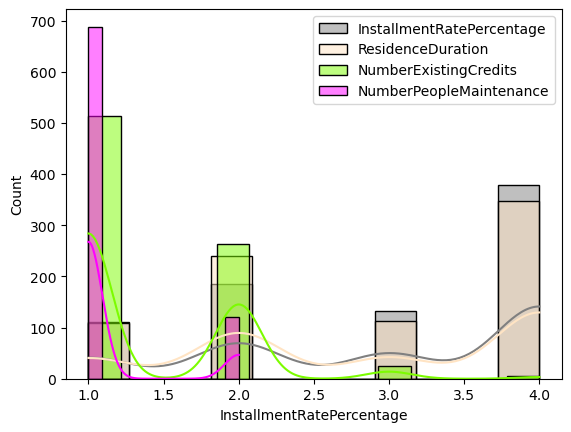

In [119]:
# LDA assumes observations within each class have Gaussian distribution, checking for it below with predictors having continuous values
sn.histplot(data=credit_train, x="InstallmentRatePercentage", color="gray", label="InstallmentRatePercentage", kde=True)
sn.histplot(data=credit_train, x="ResidenceDuration", color="bisque", label="ResidenceDuration", kde=True)
sn.histplot(data=credit_train, x="NumberExistingCredits", color="lawngreen", label="NumberExistingCredits", kde=True)
sn.histplot(data=credit_train, x="NumberPeopleMaintenance", color="fuchsia", label="NumberPeopleMaintenance", kde=True)
plt.legend() 
plt.show()

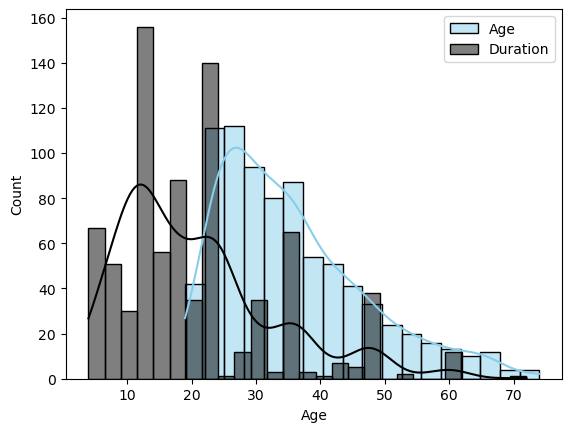

In [121]:
sn.histplot(data=credit_train, x="Age", color="skyblue", label="Age", kde=True)
sn.histplot(data=credit_train, x="Duration", color="black", label="Duration", kde=True)
plt.legend() 
plt.show()

In [132]:
from scipy.stats import normaltest
from numpy.random import seed

seed(1)
alpha = 0.05
# normality test
for (name,data) in credit_train.iteritems():
    stat, p = normaltest(data.values.tolist())
#     print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > alpha:
         print(name, ' looks Gaussian (fail to reject H0)')
    else:
         print(name, ' does not look Gaussian (reject H0)')
            
# Source: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

Class  does not look Gaussian (reject H0)
Duration  does not look Gaussian (reject H0)
Amount  does not look Gaussian (reject H0)
InstallmentRatePercentage  does not look Gaussian (reject H0)
ResidenceDuration  does not look Gaussian (reject H0)
Age  does not look Gaussian (reject H0)
NumberExistingCredits  does not look Gaussian (reject H0)
NumberPeopleMaintenance  does not look Gaussian (reject H0)
Telephone  does not look Gaussian (reject H0)
ForeignWorker  does not look Gaussian (reject H0)
CheckingAccountStatus.lt.0  does not look Gaussian (reject H0)
CheckingAccountStatus.0.to.200  does not look Gaussian (reject H0)
CheckingAccountStatus.gt.200  does not look Gaussian (reject H0)
CreditHistory.ThisBank.AllPaid  does not look Gaussian (reject H0)
CreditHistory.PaidDuly  does not look Gaussian (reject H0)
CreditHistory.Delay  does not look Gaussian (reject H0)
CreditHistory.Critical  does not look Gaussian (reject H0)


<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

Incoming experience: I had no incoming experience

Steps I took: I tried to follow the recommended steps (Assignment, Kaggle and the text book) i.e. understand the data and data exploration, transform the data if needed, feature selection, fit, predict, evaluate the model.

Obstacles encountered: Nothing major, some problems were transforming data types to what the functions' require, exploring different functions within sklearn, scipy, numpy, stats etc.

Link to real world: I'm learning how to approach solving a problem with a data set using machine learning. The main take away so far has been the structure I see that is being followed mentioned under 'Steps I took'.

Missing steps: I think we can do more data exploration, check p-values for combinations of predictors to check if they affect the output more, check if assumptions for the particular model are met with regards to the dataset. We can also drop certain features, for example foreign worker and telephone. Transforming input data with log, sqrt etc functions might normally distribute the data too (?). Also, would help to evaluate different classifiers for the same dataset.

Comments on LDA for this dataset:
1. Normal distribution test fails for predictors and LDA assumes normal distribution for X. LDA might not be a good classifier for this dataset.
2. Off the classifiers learnt so far, KNN might work the best since it does not assume any distributions.
3. p-values suggest duration, age, credit history, checking account status, no.of people liable for maintenance of credit are important predictors where as amount, installment rate percentage, number of existing credits are not which intuitively in the real world doesn't make sense. I would expect amount, installment rate percentage, number of existing credits to have an impact on the output class.